In [3]:
# 🫀 Kalp Hastalıkları Veri Analizi ve Tahmin Modeli

Bu notebook kapsamında aşağıdaki çalışmalar yapılmıştır:
- Keşifsel Veri Analizi (EDA)
- Özellik (feature) analizi ve görselleştirmeler
- Makine Öğrenmesi modeli (Logistic Regression)
- Derin Öğrenme modeli (Yapay Sinir Ağı)
- Model performans değerlendirmesi

📌 Bu proje **veri analizi ve model eğitimi** odaklıdır.  
İlerleyen aşamalarda model geliştirme, dağıtım (deployment) ve dijital ikiz benzeri yaklaşımlar eklenebilir.

# Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import display, HTML
import warnings

# Jupyter ve Pandas ayarları
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Veri setini yükle
df = pd.read_csv("../data/heart.csv")

# Kolon isimlerini Türkçe'ye çevir
turkce_kolonlar = {
    'age': 'Yaş', 'sex': 'Cinsiyet', 'cp': 'Göğüs Ağrısı Tipi',
    'trestbps': 'Dinlenik Kan Basıncı', 'chol': 'Kolesterol', 'fbs': 'Açlık Kan Şekeri > 120',
    'restecg': 'EKG Sonuçları', 'thalach': 'Maksimum Kalp Hızı', 'exang': 'Egzersizle Oluşan Anjina',
    'oldpeak': 'Egzersiz Sonrası ST Depresyonu', 'slope': 'ST Segmentinin Eğimi',
    'ca': 'Ana Damar Sayısı', 'thal': 'Talasemi', 'target': 'Kalp Hastalığı'
}
df.rename(columns=turkce_kolonlar, inplace=True)

# Kategorik değerleri sözel ifadelere çevir (görselleştirme için)
df['Cinsiyet'] = df['Cinsiyet'].replace({0: 'Kadın', 1: 'Erkek'})
df['Göğüs Ağrısı Tipi'] = df['Göğüs Ağrısı Tipi'].replace({0: 'Tipik Anjina', 1: 'Atipik Anjina', 2: 'Anjina Dışı Ağrı', 3: 'Asemptomatik'})
df['Açlık Kan Şekeri > 120'] = df['Açlık Kan Şekeri > 120'].replace({0: 'Hayır', 1: 'Evet'})
df['EKG Sonuçları'] = df['EKG Sonuçları'].replace({0: 'Normal', 1: 'ST-T Anormalliği', 2: 'Sol Ventrikül Hipertrofisi'})
df['Egzersizle Oluşan Anjina'] = df['Egzersizle Oluşan Anjina'].replace({0: 'Hayır', 1: 'Evet'})
df['ST Segmentinin Eğimi'] = df['ST Segmentinin Eğimi'].replace({0: 'Yukarı Eğim', 1: 'Düz', 2: 'Aşağı Eğim'})
df['Talasemi'] = df['Talasemi'].replace({0: 'Bilinmiyor', 1: 'Normal', 2: 'Sabit Defekt', 3: 'Geri Dönüşlü Defekt'})
df['Kalp Hastalığı'] = df['Kalp Hastalığı'].replace({0: 'Sağlıklı', 1: 'Hasta'})

--- Keşifçi Veri Analizi (EDA) ---


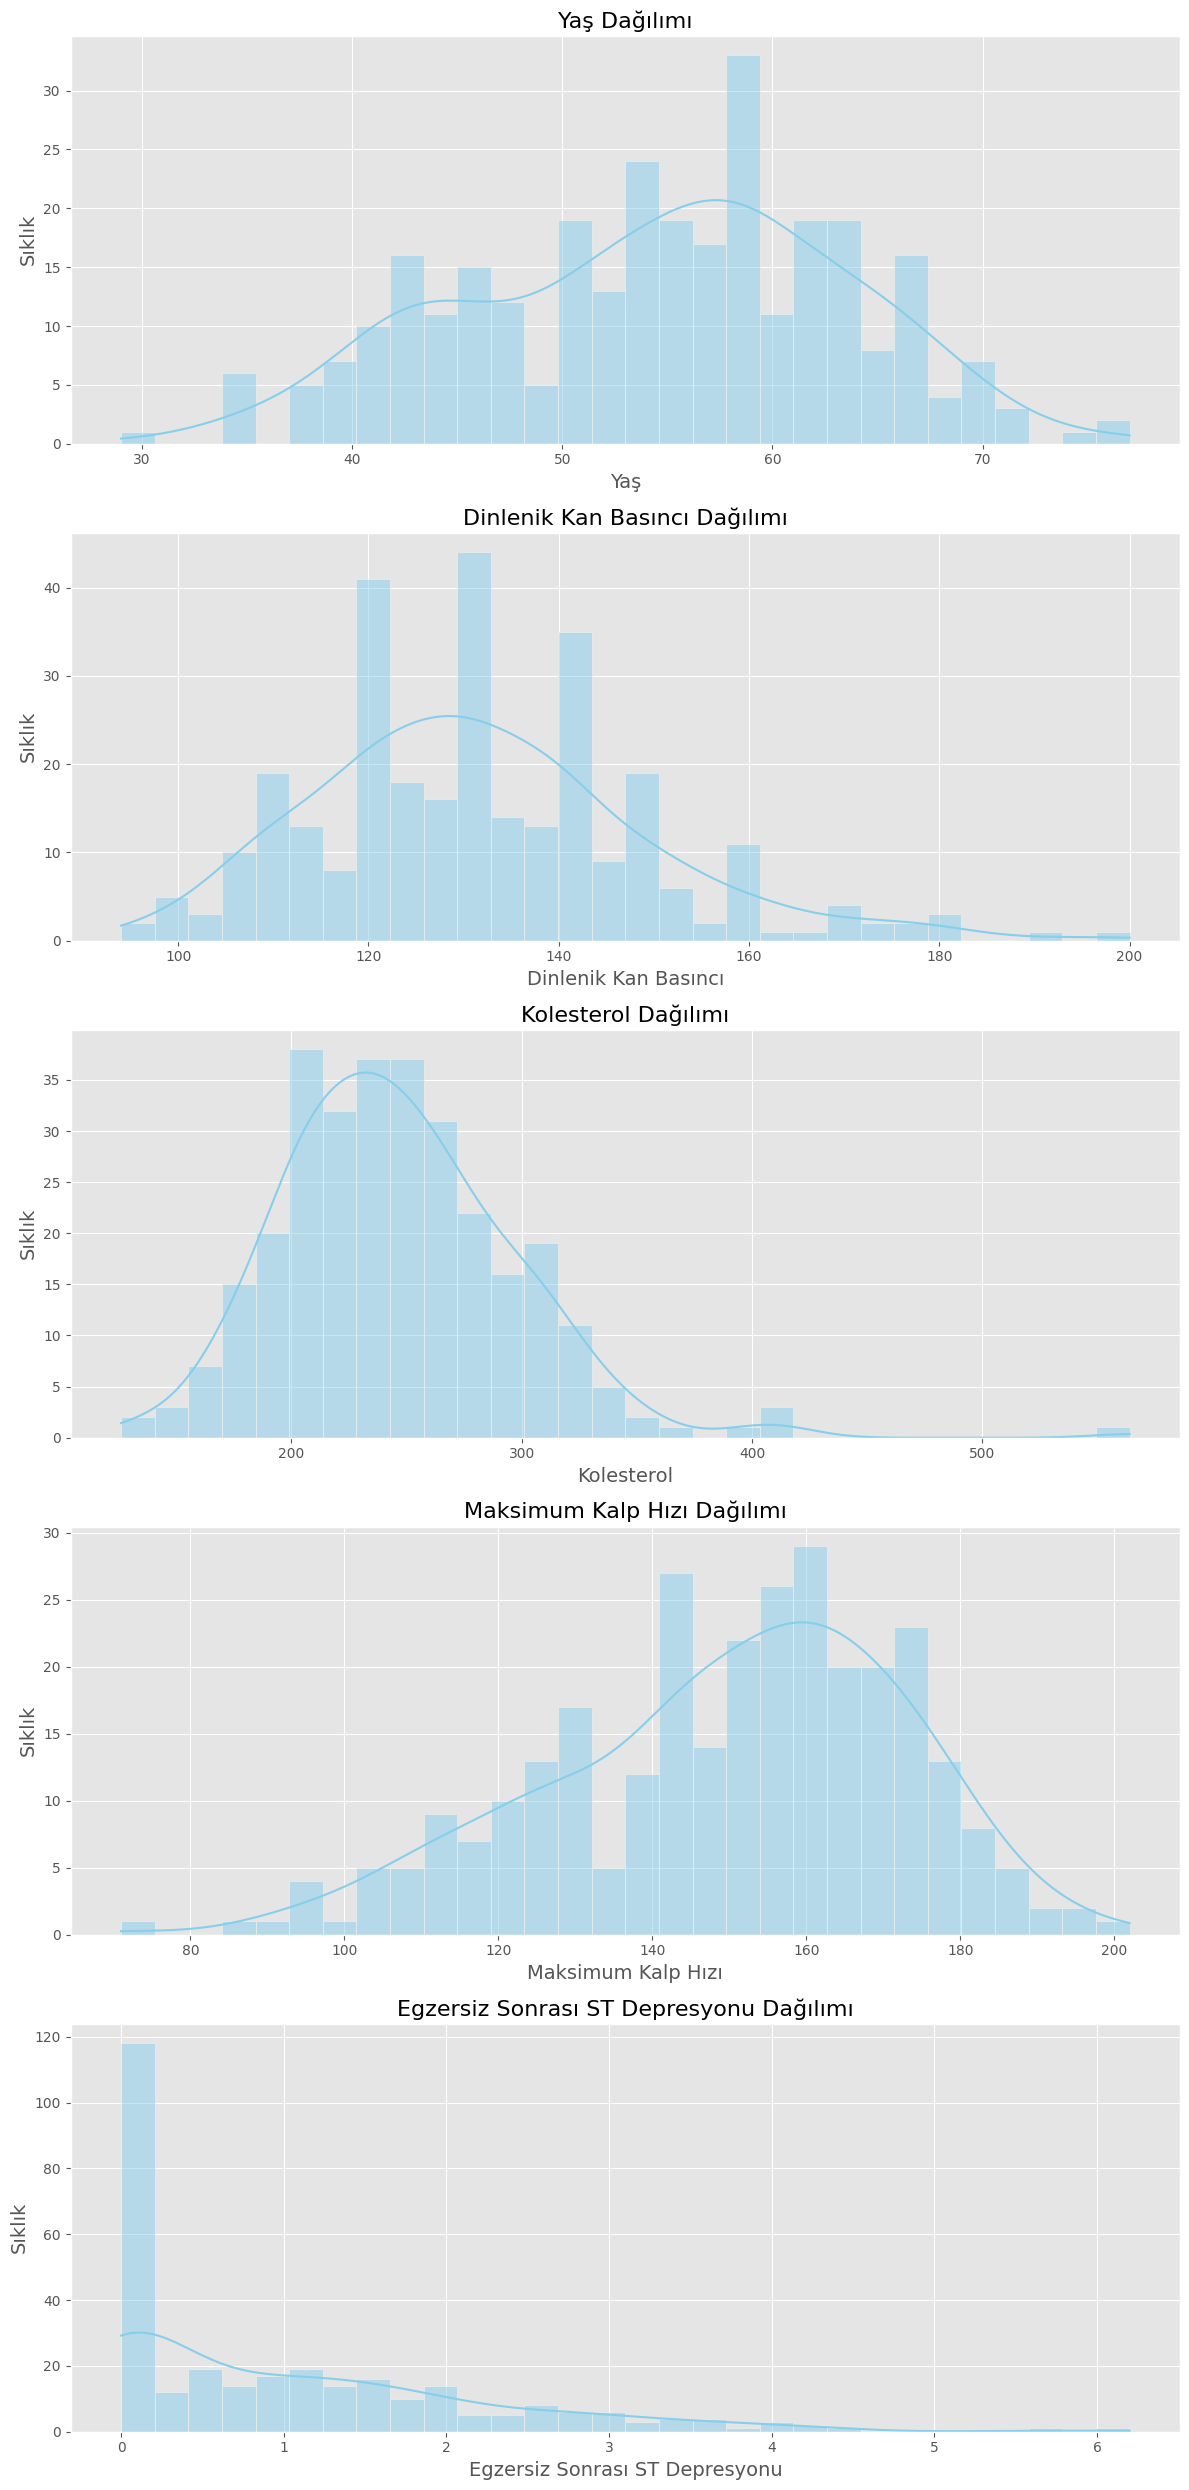

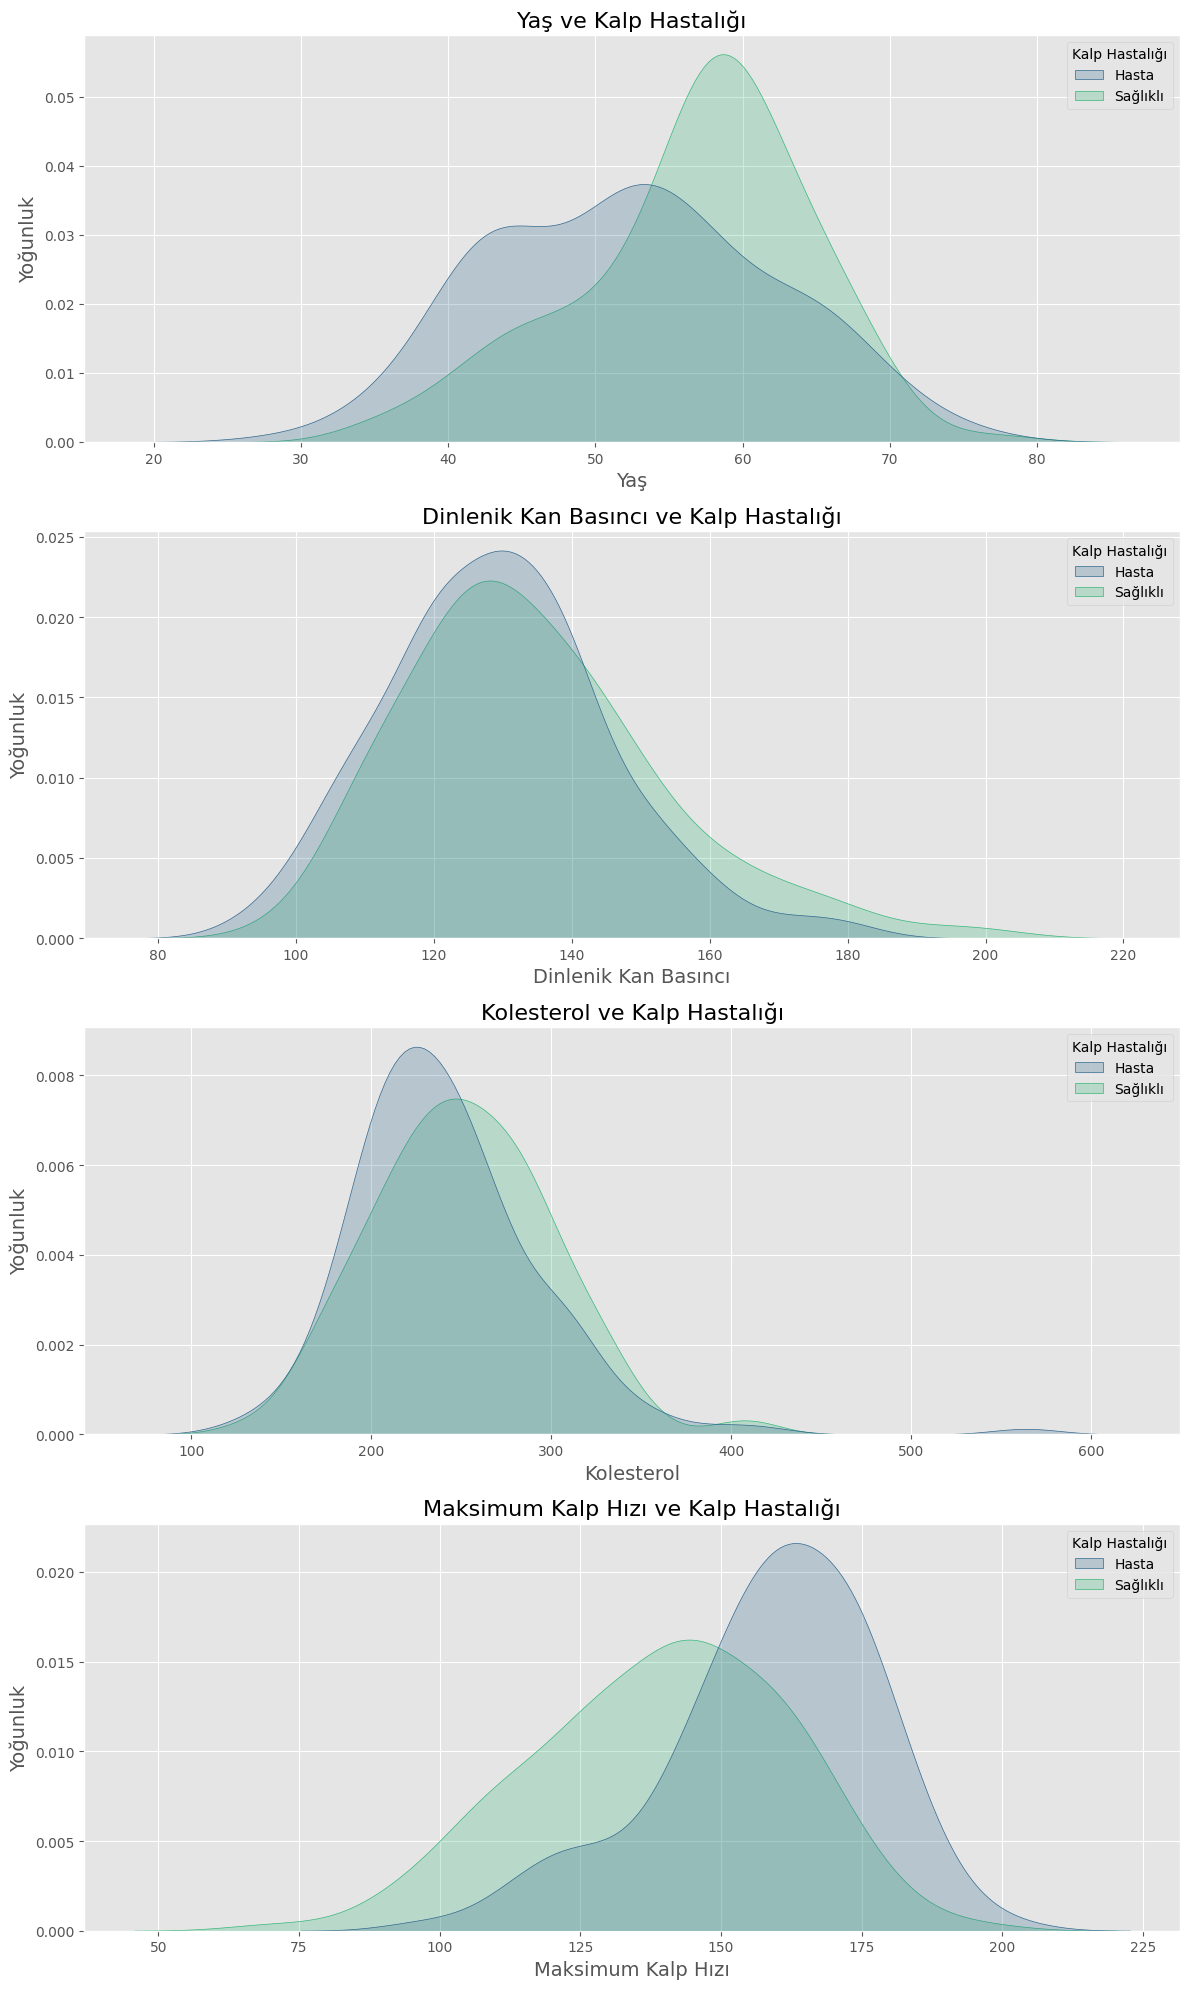

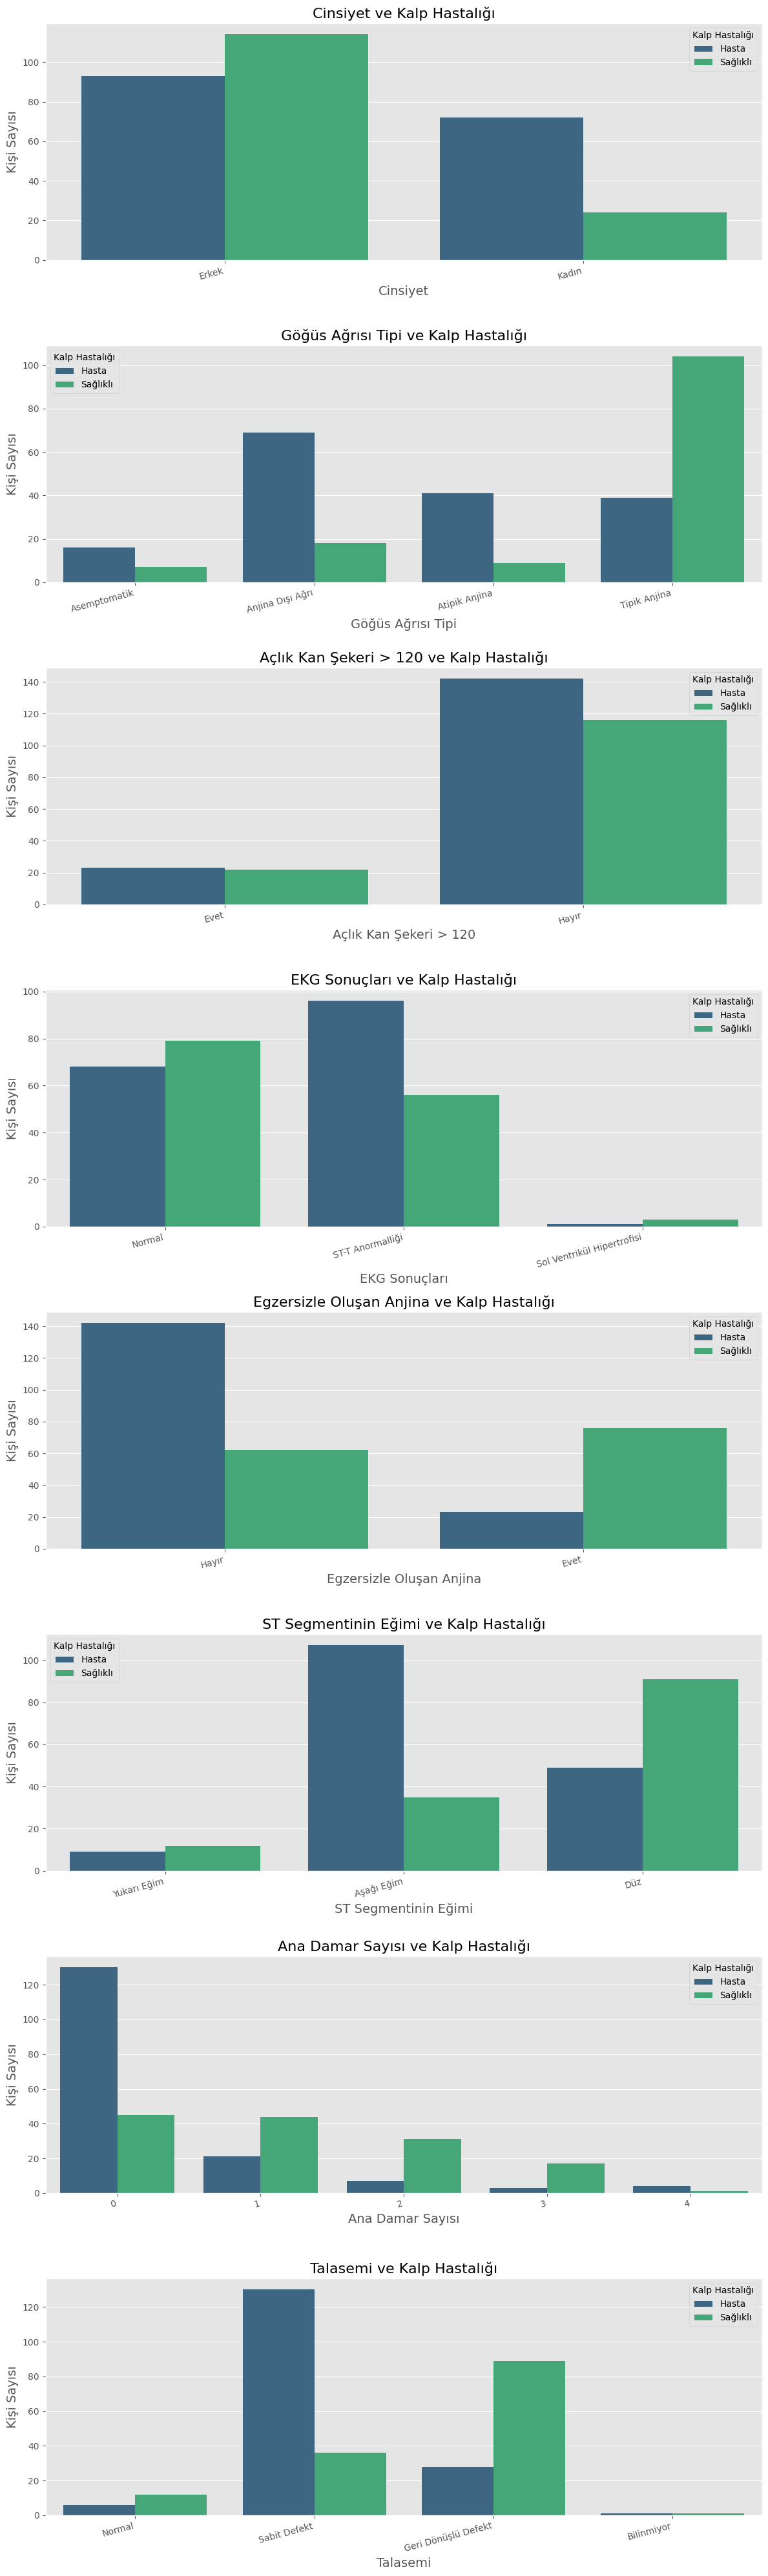

In [4]:
print("--- Keşifçi Veri Analizi (EDA) ---")

# Sürekli Değişkenlerin Dağılımları
surekli_degiskenler = ['Yaş', 'Dinlenik Kan Basıncı', 'Kolesterol', 'Maksimum Kalp Hızı', 'Egzersiz Sonrası ST Depresyonu']
plt.figure(figsize=(12, 25))
for i, kolon in enumerate(surekli_degiskenler):
    plt.subplot(5, 1, i + 1)
    sns.histplot(data=df, x=kolon, kde=True, bins=30, color='skyblue')
    plt.title(f'{kolon} Dağılımı', fontsize=16)
    plt.xlabel(kolon, fontsize=14)
    plt.ylabel('Sıklık', fontsize=14)
plt.tight_layout()
plt.show()

# Sürekli Değişkenlerin Kalp Hastalığı ile İlişkisi
plt.figure(figsize=(12, 20))
for i, kolon in enumerate(['Yaş', 'Dinlenik Kan Basıncı', 'Kolesterol', 'Maksimum Kalp Hızı']):
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(data=df, x=kolon, hue='Kalp Hastalığı', fill=True, common_norm=False, palette='viridis')
    plt.title(f'{kolon} ve Kalp Hastalığı', fontsize=16)
    plt.xlabel(kolon, fontsize=14)
    plt.ylabel('Yoğunluk', fontsize=14)
plt.tight_layout()
plt.show()

# Kategorik Değişkenlerin Kalp Hastalığı ile İlişkisi
kategorik_degiskenler = ['Cinsiyet', 'Göğüs Ağrısı Tipi', 'Açlık Kan Şekeri > 120', 'EKG Sonuçları',
    'Egzersizle Oluşan Anjina', 'ST Segmentinin Eğimi', 'Ana Damar Sayısı', 'Talasemi']
plt.figure(figsize=(12, 40))
for i, kolon in enumerate(kategorik_degiskenler):
    plt.subplot(len(kategorik_degiskenler), 1, i + 1)
    sns.countplot(x=kolon, hue='Kalp Hastalığı', data=df, palette='viridis')
    plt.title(f'{kolon} ve Kalp Hastalığı', fontsize=16)
    plt.xlabel(kolon, fontsize=14)
    plt.ylabel('Kişi Sayısı', fontsize=14)
    plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


--- Tüm Değişkenler Arası Korelasyon Matrisi ---


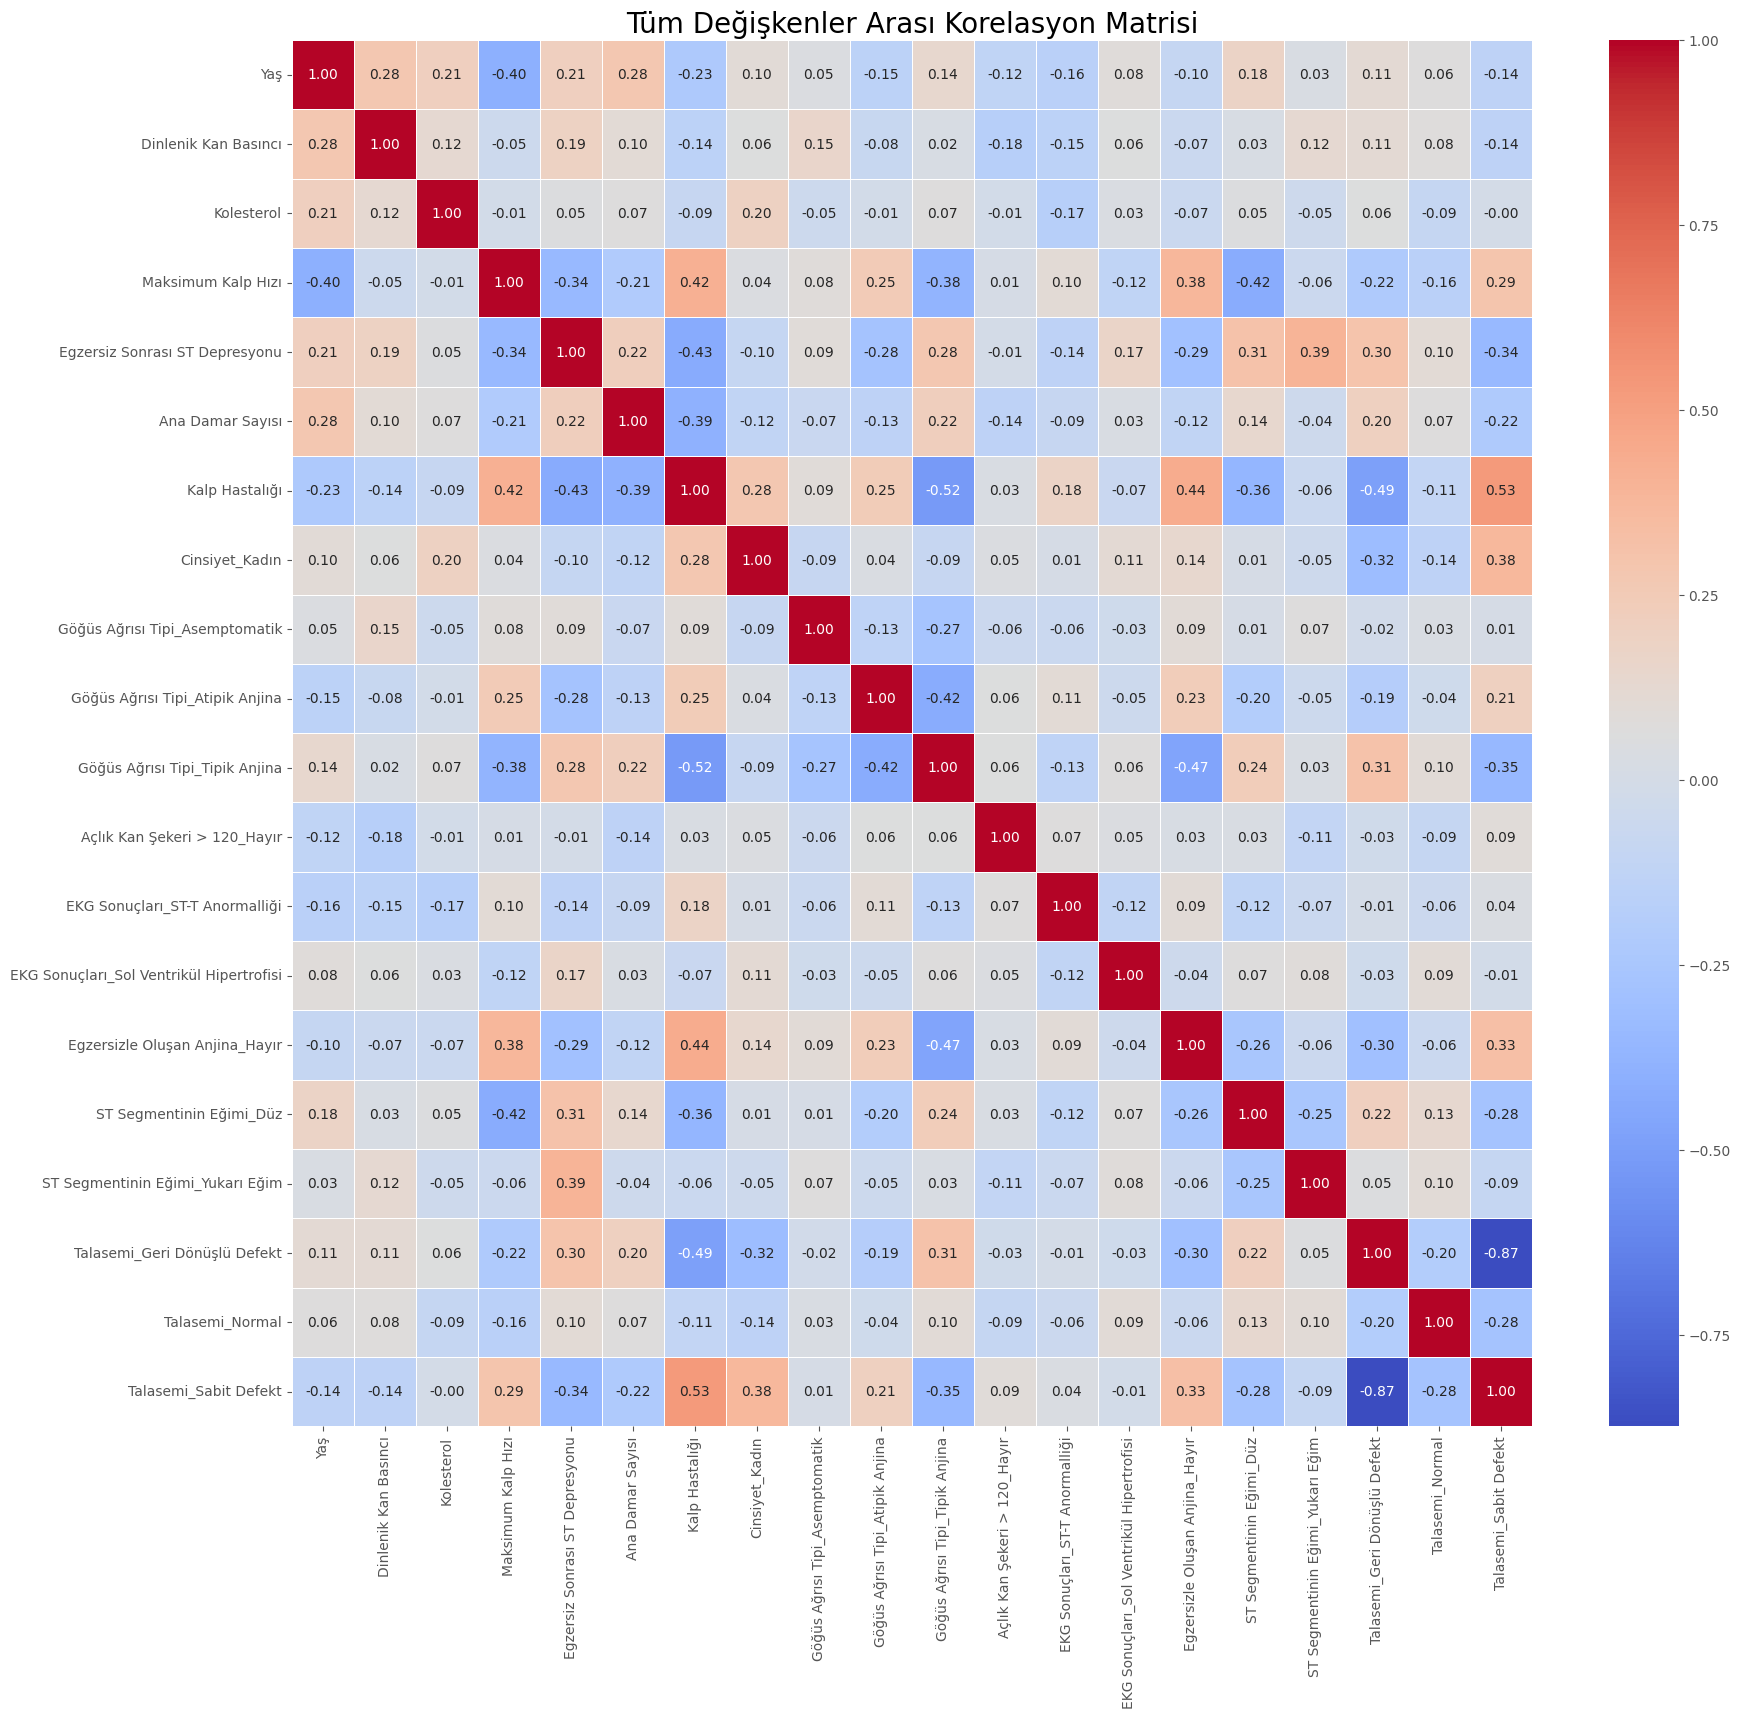

In [5]:
# --- Korelasyon Matrisi için Veri Ön İşleme ---
# Orijinal veri setinin bir kopyasını oluştur (EDA grafiklerini bozmamak için)
df_corr = df.copy()

# 'Kalp Hastalığı' kolonunu sayısal değere çevir
df_corr['Kalp Hastalığı'] = df_corr['Kalp Hastalığı'].replace({'Sağlıklı': 0, 'Hasta': 1})

# Kategorik kolonları belirle
kategorik_kolonlar = [
    'Cinsiyet', 'Göğüs Ağrısı Tipi', 'Açlık Kan Şekeri > 120', 'EKG Sonuçları',
    'Egzersizle Oluşan Anjina', 'ST Segmentinin Eğimi', 'Talasemi'
]

# One-Hot Encoding uygula
# drop_first=True parametresi, çoklu eşdoğrusallığı (multicollinearity) önlemek için her kategoriden bir kolonu düşürür
df_corr = pd.get_dummies(df_corr, columns=kategorik_kolonlar, prefix=kategorik_kolonlar, drop_first=True)


# --- Tüm Kolonlar için Korelasyon Matrisi ---
print("\n--- Tüm Değişkenler Arası Korelasyon Matrisi ---")
plt.figure(figsize=(20, 18)) # Boyutları tüm kolonları sığdırmak için büyütüldü

# Korelasyon matrisini oluştur
korelasyon_matrisi = df_corr.corr()

# Isı haritasını çizdir
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Tüm Değişkenler Arası Korelasyon Matrisi', fontsize=20)
plt.show()


--- Lojistik Regresyon Modeli ---
Doğruluk Oranı (Accuracy): 0.9016393442622951

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



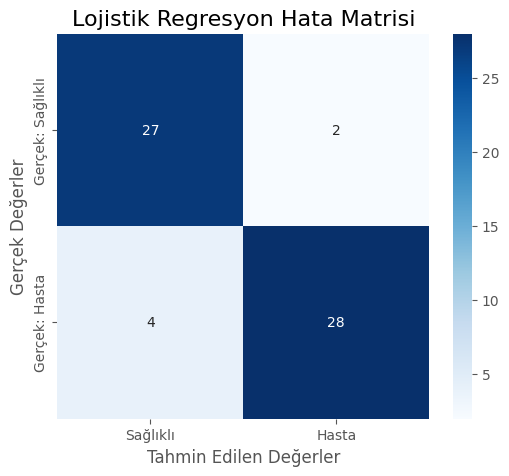

In [6]:
print("\n--- Lojistik Regresyon Modeli ---")

# Modeller için veriyi hazırlama: Kategorik verileri sayısal formata çevir
df_model = df.copy()
kategorik_kolonlar = ['Cinsiyet', 'Göğüs Ağrısı Tipi', 'Açlık Kan Şekeri > 120', 'EKG Sonuçları',
    'Egzersizle Oluşan Anjina', 'ST Segmentinin Eğimi', 'Talasemi']
for kolon in kategorik_kolonlar:
    df_model = pd.get_dummies(df_model, columns=[kolon], prefix=kolon, drop_first=True)

df_model['Kalp Hastalığı'] = df_model['Kalp Hastalığı'].replace({'Sağlıklı': 0, 'Hasta': 1})

# Özellikleri (X) ve hedef değişkeni (y) ayır
X = df_model.drop('Kalp Hastalığı', axis=1)
y = df_model['Kalp Hastalığı']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur, eğit ve tahmin yap
model_lr = LogisticRegression(max_iter=5000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Model performansını değerlendir
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred_lr))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_lr))

# Hata Matrisi
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Sağlıklı', 'Hasta'], yticklabels=['Gerçek: Sağlıklı', 'Gerçek: Hasta'])
plt.title('Lojistik Regresyon Hata Matrisi', fontsize=16)
plt.xlabel('Tahmin Edilen Değerler', fontsize=12)
plt.ylabel('Gerçek Değerler', fontsize=12)
plt.show()


--- Derin Öğrenme Modeli (Yapay Sinir Ağı) ---
Model Eğitimi Başlıyor...
Test Verisi Doğruluk Oranı (Accuracy): 0.90


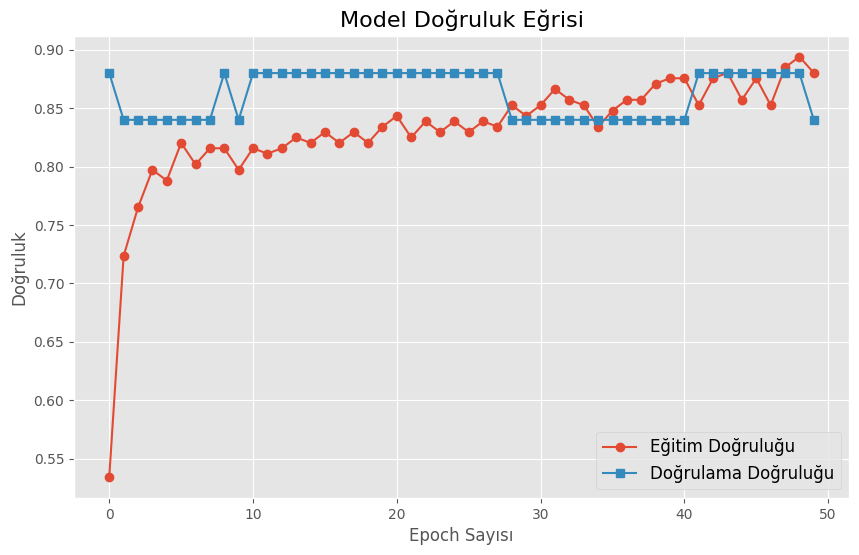

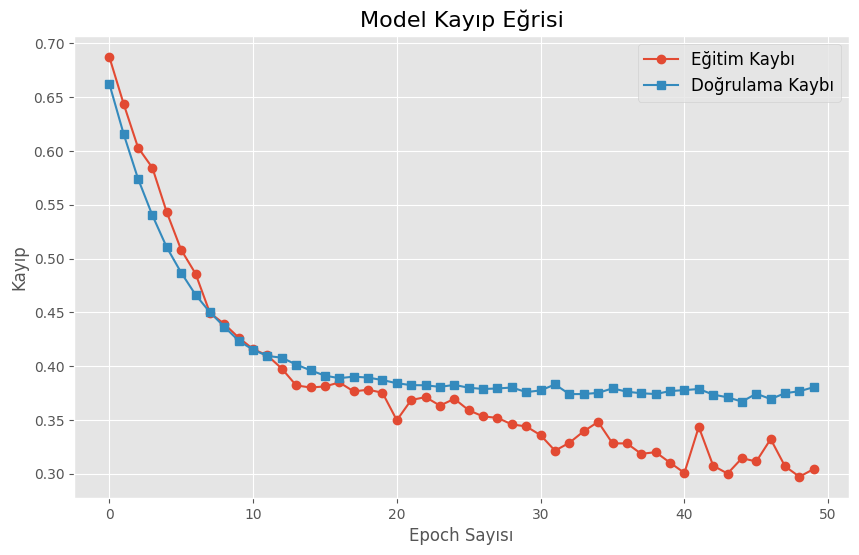

In [7]:
print("\n--- Derin Öğrenme Modeli (Yapay Sinir Ağı) ---")

# Veriyi normalleştir
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sinir Ağı modelini oluştur
model_dl = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_dl.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Modeli derle
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
print("Model Eğitimi Başlıyor...")
history = model_dl.fit(
    X_train_dl, y_train_dl,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=0
)

# Modelin performansını test verisi üzerinde değerlendir
loss, accuracy = model_dl.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"Test Verisi Doğruluk Oranı (Accuracy): {accuracy:.2f}")

# Model eğitim ve doğrulama doğruluğu grafiği
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', marker='o')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', marker='s')
plt.title('Model Doğruluk Eğrisi', fontsize=16)
plt.xlabel('Epoch Sayısı', fontsize=12)
plt.ylabel('Doğruluk', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

# Model eğitim ve doğrulama kaybı grafiği
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı', marker='o')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', marker='s')
plt.title('Model Kayıp Eğrisi', fontsize=16)
plt.xlabel('Epoch Sayısı', fontsize=12)
plt.ylabel('Kayıp', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()